# Assignment 3 Python

## Library and Data Prepping

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [234]:
df = pd.read_csv('dataset/bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [235]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## Data Cleaning

a. Mengidentifikasi nilai yang hilang / _missing values_ pada dataset.

In [237]:
print('Bank Data: ')
print(df.isnull().sum(), '\n')

Bank Data: 
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64 



Diketahui bahwa tidak terdapat missing value pada tiap atribut/kolom.

b. Menghapus kolom yang kurang relevan.

Kali ini, saya menghapus kolom `campaign`, `pdays`, `previous`, dan `poutcome`.

In [238]:
df = df.drop(columns=['campaign', 'pdays', 'previous', 'poutcome'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  y          4521 non-null   object
dtypes: int64(4), object(9)
memory usage: 459.3+ KB


In [239]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,no


Jika ditelaah lebih teliti, terdapat nilai `unknown` pada beberapa kolom. nilai `unknown` bisa saja mempengaruhi kinerja algoritma yang akan digunakan nanti. Maka dari itu akan dilakukan penghapusan data yang memiliki nilai `unknown`.

c. Menghapus data dengan nilai `unknown`

c.1 Mengubah nilai `unknown` menjadi `NaN` guna mempermudah penghapusan data.

In [240]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,no


c.2 Menghapus data dengan nilai `NaN`

Dapat dilihat dari informasi di atas, hanya kolom `balance` yang memiliki nilai `inf` dan/atau `-inf` yang sudah berubah menjadi `NaN`.

In [241]:
df = df.drop(df[df['balance'].isnull()].index)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,no


In [242]:
df.shape

(4521, 13)

Setelah melakukan data cleaning, didapatkan hasil akhir dataset yaitu 3064 baris dan 13 kolom.

## Data Exploration

In [243]:
df.describe()

,age,balance,day,duration
count,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292
std,10.576211,3009.638142,8.247667,259.856633
min,19.000000,-3313.000000,1.000000,4.000000
25%,33.000000,69.000000,9.000000,104.000000
50%,39.000000,444.000000,16.000000,185.000000
75%,49.000000,1480.000000,21.000000,329.000000
max,87.000000,71188.000000,31.000000,3025.000000


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  y          4521 non-null   object
dtypes: int64(4), object(9)
memory usage: 459.3+ KB


### Visualization

#### Pie Chart

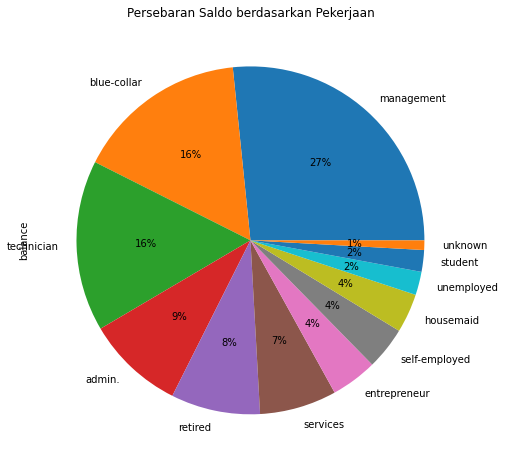

In [245]:
df_area = df.groupby(['job']).sum()['balance'].sort_values(ascending=False)
df_area.plot(kind='pie', figsize=(22,8), autopct='%1.0f%%')

plt.title("Persebaran Saldo berdasarkan Pekerjaan")
plt.show()

Berdasarkan pie chart di atas, dapat dilihat bahwa kelompok individu dengan pekerjaan di bidang `management` memiliki jumlah saldo terbanyak dengan persentase **29%**. Sedangkan kelompok individu yang pengangguran (`unemployed`) dan pelajar (`student`) memiliki jumlah saldo paling sedikit dengan persentase masing-masing **2%**.

#### Bar Plot

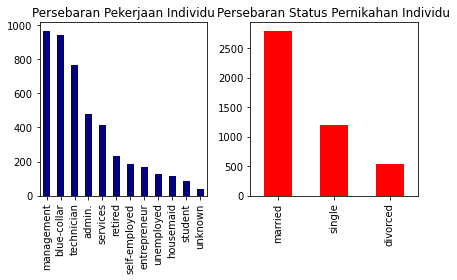

In [246]:
plt.subplot(1,2,1)
df['job'].value_counts().plot.bar(color='navy')
plt.title('Persebaran Pekerjaan Individu')

plt.subplot(1,2,2)
df['marital'].value_counts().plot.bar(color='red')
plt.title('Persebaran Status Pernikahan Individu')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Persebaran Jenjang Pendidikan Terakhir Individu')

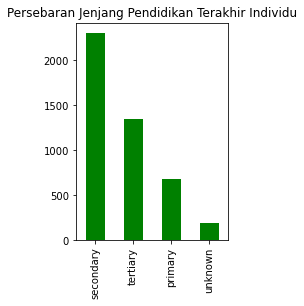

In [247]:
plt.subplot(1,2,1)
df['education'].value_counts().plot.bar(color='green')
plt.title('Persebaran Jenjang Pendidikan Terakhir Individu')

Pada ketiga bar plot di atas, dapat disimpulkan bahwa:
- Kelompok individu yang bekerja di bidang `management` meraih jumlah terbanyak. Sedangkan kelompok individu yang merupakan pelajar (`student`) memiliki jumlah yang paling sedikit.
- Kelompok individu yang berstatus menikah (`married`) meraih jumlah terbanyak. Sedangkan kelompok individu yang statusnya janda/duda (`divorced`) meraih jumlah yang paling sedikit.
- Kelompok individu yang jenjang pendidikan terakhirnya adalah Sekolah Menengah Atas (`tertiary`) memiliki jumlah terbanyak. Kelompok individu yang jenjang pendidikan terakhirnya adalah Sekolah Dasar (`primary`) meraih jumlah yang paling sedikit.

## Preprocessing

a. Mengganti nama atribut menjadi lebih mudah dipahami

Kali ini, saya mengganti nama atribut ke dalam Bahasa Indonesia.

In [248]:
df = df.rename(columns={'age': 'umur',
                                  'job': 'pekerjaan',
                                  'marital': 'status_pernikahan',
                                  'education': 'pendidikan',
                                  'default': 'punya_kredit',
                                  'balance': 'saldo',
                                  'housing': 'pjm_rumah',
                                  'loan': 'peminjaman',
                                  'contact': 'kontak',
                                  'day': 'hari',
                                  'month': 'bulan',
                                  'duration': 'durasi_terakhir'
                                 })

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   umur               4521 non-null   int64 
 1   pekerjaan          4521 non-null   object
 2   status_pernikahan  4521 non-null   object
 3   pendidikan         4521 non-null   object
 4   punya_kredit       4521 non-null   object
 5   saldo              4521 non-null   int64 
 6   pjm_rumah          4521 non-null   object
 7   peminjaman         4521 non-null   object
 8   kontak             4521 non-null   object
 9   hari               4521 non-null   int64 
 10  bulan              4521 non-null   object
 11  durasi_terakhir    4521 non-null   int64 
 12  y                  4521 non-null   object
dtypes: int64(4), object(9)
memory usage: 459.3+ KB


In [249]:
df.head()

,umur,pekerjaan,status_pernikahan,pendidikan,punya_kredit,saldo,pjm_rumah,peminjaman,kontak,hari,bulan,durasi_terakhir,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,no


b. Melakukan inisialisasi variabel X dan y

variabel `X` berisikan seluruh atribut dari `df` kecuali kolom `y`, sedangkan variabel `y` hanya berisikan kolom `y`.

In [250]:
X = df.drop('y', axis=1)
y = df['y']

print(X.shape)
print(y.shape)

(4521, 12)
(4521,)


b. Encoding atribut kategorik menggunakan replace

In [251]:
df['punya_kredit'].replace({'no':0, 'yes': 1}, inplace = True)
df['pjm_rumah'].replace({'no':0, 'yes': 1}, inplace = True)
df['peminjaman'].replace({'no':0, 'yes': 1}, inplace = True)
df['y'].replace({'no':0, 'yes': 1}, inplace = True)

df['bulan'].replace({'jan': 1, 
                     'feb': 2,
                     'mar': 3,
                     'apr': 4,
                     'may': 5,
                     'jun': 6,
                     'jul': 7,
                     'aug': 8, 
                     'sep': 9,
                     'oct': 10,
                     'nov': 11,
                     'dec': 12}, inplace = True)
df.head()

,umur,pekerjaan,status_pernikahan,pendidikan,punya_kredit,saldo,pjm_rumah,peminjaman,kontak,hari,bulan,durasi_terakhir,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,10,79,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,5,220,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,4,185,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,6,199,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,5,226,0


In [252]:
def encode_data(feature_name):
     
    mapping_dict = {}
    unique_values = list(df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

df['pekerjaan'].replace(encode_data('pekerjaan'), inplace = True)
df['status_pernikahan'].replace(encode_data('status_pernikahan'), inplace = True)
df['pendidikan'].replace(encode_data('pendidikan'), inplace = True)
df['kontak'].replace(encode_data('kontak'), inplace = True)

{'unemployed': 0, 'services': 1, 'management': 2, 'blue-collar': 3, 'self-employed': 4, 'technician': 5, 'entrepreneur': 6, 'admin.': 7, 'student': 8, 'housemaid': 9, 'retired': 10, 'unknown': 11}
{'married': 0, 'single': 1, 'divorced': 2}
{'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
{'cellular': 0, 'unknown': 1, 'telephone': 2}


c. Melakukan inisialisasi ulang setelah encoding

In [253]:
X = df.drop('y', axis=1)
y = df['y']

print(X.shape)
print(y.shape)

(4521, 12)
(4521,)


## Algorithms

a. Membagi proporsi data menjadi 80% untuk data latih dan 20% untuk data uji

In [254]:
x_train, x_cv, y_train, y_cv = train_test_split (X, y, test_size=0.2)

In [255]:
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_cv)

In [256]:
print(x_train.shape)
print(x_test.shape)

(3616, 12)
(905, 12)


Didapatkan proporsi data latih sebanyak 2451 data, dan data uji sebanyak 613 data.

### Logistic Regression

In [257]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [258]:
LogisticRegression(C=1.0,
                   class_weight=None,
                   dual=False,
                   fit_intercept=True,
                   intercept_scaling=1,
                   l1_ratio=None,
                   max_iter=100,
                   multi_class='auto',
                   n_jobs=None,
                   penalty='l2', 
                   random_state=None,
                   solver='lbfgs', 
                   tol=0.0001,
                   verbose=0,
                   warm_start=False
                   )

LogisticRegression()

In [259]:
pred_cv_lg = lg.predict(x_cv)

D:\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [260]:
print(accuracy_score(y_cv, pred_cv_lg))
matrix_lg = confusion_matrix(y_cv, pred_cv_lg)
print(matrix_lg)

0.10718232044198896
[[  0 808]
 [  0  97]]


Pada algoritma Logistic Regression, didapatkan hasil sebagai berikut:
- Nilai akurasi: 0.148 (14,8%)
- Nilai TP (_True Positive_) adalah 0
- Nilai FP (_False Positive_) adalah 522
- Nilai TN (_True Negative_) adalah 0
- Nilai FN (_False Negative_) adalah 91

### Decision Tree

In [261]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [262]:
DecisionTreeClassifier(ccp_alpha=0.0,
                       class_weight=None,
                       criterion='gini',
                       max_depth=None,
                       max_features=None,
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1,
                       min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None,
                       splitter='best')

DecisionTreeClassifier()

In [263]:
pred_cv_dt = dt.predict(x_test)

In [264]:
print(accuracy_score(y_cv, pred_cv_dt))
matrix_dt=confusion_matrix(y_cv, pred_cv_dt)
print(matrix_dt)

0.8629834254143647
[[742  66]
 [ 58  39]]


Pada algoritma Decision Tree Classifier, didapatkan hasil sebagai berikut:
- Nilai akurasi: 0.805 (80,5%)
- Nilai TP (_True Positive_) adalah 461
- Nilai FP (_False Positive_) adalah 61
- Nilai TN (_True Negative_) adalah 58
- Nilai FN (_False Negative_) adalah 33

### Random Forest Algorithm

In [265]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [266]:
RandomForestClassifier(bootstrap=True, 
                       ccp_alpha=0.0,
                       class_weight=None,
                       criterion='gini',
                       max_depth=None,
                       max_features='auto',
                       max_leaf_nodes=None,
                       max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1,
                       min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       n_estimators=100,
                       n_jobs=None,
                       oob_score=False,
                       random_state=None,
                       verbose=0,
                       warm_start=False)

RandomForestClassifier()

In [267]:
pred_cv_rf = rf.predict(x_test)

In [268]:
print(accuracy_score(y_cv, pred_cv_rf))
matrix_rf=confusion_matrix(y_cv, pred_cv_rf)
print(matrix_rf)

0.9038674033149171
[[792  16]
 [ 71  26]]


Pada algoritma Random Forest Classifier, didapatkan hasil sebagai berikut:
- Nilai akurasi: 0.840 (84%)
- Nilai TP (_True Positive_) adalah 502
- Nilai FP (_False Positive_) adalah 20
- Nilai TN (_True Negative_) adalah 78
- Nilai FN (_False Negative_) adalah 13

### Support Vector Machine (SVM)

In [269]:
svm_m = svm.SVC()
svm_m.fit(x_train, y_train)

SVC()

In [270]:
SVC(C=1.0,
    break_ties=False,
    cache_size=200,
    class_weight=None,
    coef0=0.0,
    decision_function_shape='ovr',
    degree=3,
    gamma='scale', 
    kernel='rbf',
    max_iter=-1,
    probability=False,
    random_state=None,
    shrinking=True,
    tol=0.001,
    verbose=False)

SVC()

In [271]:
pred_cv_svm = svm_m.predict(x_test)

In [272]:
print(accuracy_score(y_cv, pred_cv_svm))
matrix_svm=confusion_matrix(y_cv, pred_cv_svm)
print(matrix_svm)

0.8972375690607735
[[802   6]
 [ 87  10]]


Pada algoritma SVM, didapatkan hasil sebagai berikut:
- Nilai akurasi: 0.858 (85,8%)
- Nilai TP (_True Positive_) adalah 518
- Nilai FP (_False Positive_) adalah 4
- Nilai TN (_True Negative_) adalah 83
- Nilai FN (_False Negative_) adalah 8

### Naive Bayes

In [273]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [274]:
pred_cv_nb = nb.predict(x_test)

In [275]:
print(accuracy_score(y_cv, pred_cv_nb))
matrix_nb=confusion_matrix(y_cv, pred_cv_nb)
print(matrix_nb)

0.8917127071823204
[[768  40]
 [ 58  39]]


Pada algoritma Naive Bayes, didapatkan hasil sebagai berikut:
- Nilai akurasi: 0.833 (83,3%)
- Nilai TP (_True Positive_) adalah 486
- Nilai FP (_False Positive_) adalah 36
- Nilai TN (_True Negative_) adalah 66
- Nilai FN (_False Negative_) adalah 25

### K-Nearest Neighbor (k-NN)

In [276]:
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)

KNeighborsClassifier()

In [277]:
pred_cv_kNN = kNN.predict(x_test)

In [278]:
print(accuracy_score(y_cv, pred_cv_kNN))
matrix_kNN=confusion_matrix(y_cv, pred_cv_kNN)
print(matrix_kNN)

0.8994475138121547
[[789  19]
 [ 72  25]]


Pada algoritma k-NN, didapatkan hasil sebagai berikut:
- Nilai akurasi: 0.853 (85,3%)
- Nilai TP (_True Positive_) adalah 508
- Nilai FP (_False Positive_) adalah 14
- Nilai TN (_True Negative_) adalah 76
- Nilai FN (_False Negative_) adalah 15

### Final Result

In [279]:
print('Logistic Regression: ', accuracy_score(y_cv, pred_cv_lg))
print('Decision Tree: ', accuracy_score(y_cv, pred_cv_dt))
print('Random Forest: ', accuracy_score(y_cv, pred_cv_rf))
print('SVM: ', accuracy_score(y_cv, pred_cv_svm))
print('Naive Bayes: ', accuracy_score(y_cv, pred_cv_nb))
print('k-NN: ', accuracy_score(y_cv, pred_cv_kNN))

Logistic Regression:  0.10718232044198896
Decision Tree:  0.8629834254143647
Random Forest:  0.9038674033149171
SVM:  0.8972375690607735
Naive Bayes:  0.8917127071823204
k-NN:  0.8994475138121547


## Kesimpulan

Setelah melakukan berbagai penghitungan, dapat ditarik beberapa kesimpulan sebagai berikut:
- Kelompok dengan jumlah saldo terbanyak diraih oleh kelompok pekerja di bidang `management` dengan persentase sebesar **29%**. Sedangkan kelompok dengan jumlah saldo tersedikit diraih oleh kelompok pelajar (`student`) dan pengangguran (`unemployed`) dengan persentase masing-masing **2%**. 
- Nilai akurasi dalam klasifikasi data tertinggi diraih oleh **k-Nearest Neighbor (KNN)** dengan perolehan nilai **0.851 (85,1%)**. Yang dilanjut oleh **Random Forest Classifier** dengan nilai **0.848 (84,8%)**, dan **Naive Bayes** dengan nilai **0.846 (84,6%)**.
- Nilai akurasi dalam klasifikasi data terendah diraih oleh **Logistic Regression** dengan perolehan nilai **0.156 (15,6%)**.
- Dengan ini, algoritma **k-Nearest Neighbor** merupakan algoritma terbaik untuk klasifikasi data, dan algoritma **Logistic Regression** merupakan algoritma yang paling kurang efektif untuk klasifikasi data.